In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno 

## Objetivos:

Neste notebook irei aplicar conceitos de Estatística Descritiva aprendidos no Curso de Estatística com a Profª Fernanda Maciel.

Após as análises, irei elaborar uma apresentação para comunicar os insights a respeito desta análise descritiva.

Os dados usados foram retirados do Kaggle https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data

Os dados foram elaborados pelo autor para um curso de marketing e ciência de dados, que contém informações a respeito dos investimentos realizados em propaganda para cada tipo de mídia e os valores de venda do produto.

Depois realizarei uma Análise Estatística para verificar quais mídias valem mais a pena de continuar investindo por gerarem maiores retornos financeiros. (será realizado em outro notebook, como uma parte 2), bem como a atualização da apresentação.

## Carregando os dados:

In [2]:
df = pd.read_csv("dados/sales.csv")

In [3]:
sns.set_palette("pastel")

How should we allocate our limited marketing budget for next year?
What type on influencers should we focus on?
Can we cut budget from TV, as it is too expensive?
Finally, set your assumptions of the marketing budget and influencer (if any). Can you try to predict the expected sales based on the best ML model?

## Visão Geral:

A tabela possui  4572 linhas e 5 colunas

In [4]:
df.shape

(4572, 5)

In [5]:
df.head().round(2)

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.57,2.91,Mega,54.73
1,13.0,9.24,2.41,Mega,46.68
2,41.0,15.89,2.91,Mega,150.18
3,83.0,30.02,6.92,Mega,298.25
4,15.0,8.44,1.41,Micro,56.59


### Traduzir os nomes das colunas para o português

In [6]:
dados = df.rename(columns = {'Social Media': 'MidiaSocial', 'Influencer': 'Influenciador', 'Sales': 'Vendas'}).copy()

In [7]:
dados.head()

,TV,Radio,MidiaSocial,Influenciador,Vendas
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


<b> TV: </b> Orçamento das propagandas na TV (em milhões) <br>
<b> Radio </b> Orçamento das propagandas no Radio (em milhões)  <br>
<b> MidiaSocial: </b> Orçamento das propagandas nas mídias sociais (em milhões)  <br>
<b> Influenciador: </b> Indica se as propagandas foram realizadas por Mega, Macro, Nano, Micro influenciadores <br>
<b> Vendas: </b> (em milhões)

### Tipos de dados

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TV             4562 non-null   float64
 1   Radio          4568 non-null   float64
 2   MidiaSocial    4566 non-null   float64
 3   Influenciador  4572 non-null   object 
 4   Vendas         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


<b> TV: </b> Dado numérico contínuo, razão <br>
<b> Radio </b> Dado numérico contínuo, razão  <br>
<b> MidiaSocial: </b> Dado numérico contínuo, razão  <br>
<b> Influenciador: </b> Dado categórico nominal <br>
<b> Vendas: </b> Dado numérico contínuo, razão

In [9]:
num_var = ['TV', 'Radio', 'MidiaSocial', 'Vendas']
 

In [10]:
cat_var = ['Influenciador']

### Verificando se existem dados ausentes e/ou duplicados:

Existem alguns dados ausentes.

In [11]:
nulos = dados.isnull().sum()

In [12]:
nulos = nulos.to_frame(name = "Valores Ausentes")
nulos

,Valores Ausentes
TV,10
Radio,4
MidiaSocial,6
Influenciador,0
Vendas,6


In [13]:
dados[dados.duplicated()]

,TV,Radio,MidiaSocial,Influenciador,Vendas


### Tratando os valores ausentes:

Como o conjunto de dados não é muito grande, irei imputar os valores ausentes com a respectiva mediana porque os dados não possuem uma distribuição normal.

In [14]:
titulos = ['TV', 'Rádio','MidiaSocial', 'Vendas']

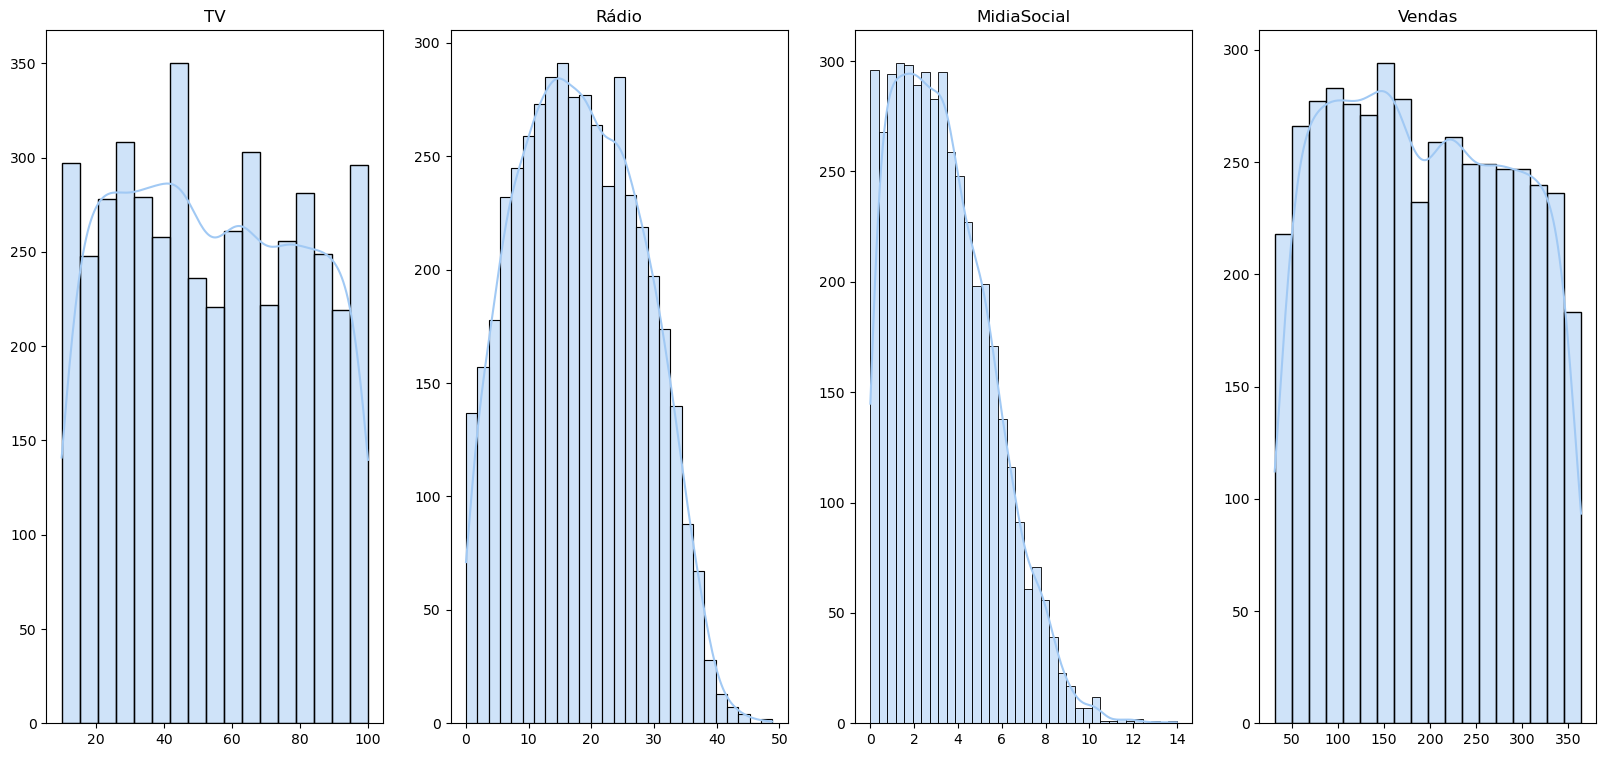

In [15]:
plt.figure(figsize = (20,9))
for i in range(0, len(num_var)):
    plt.subplot(1,4, i + 1)
    chart = sns.histplot(x = dados[num_var[i]], kde = True)
    chart.set_title(f'{titulos[i]}')
    chart.set_xlabel("")
    chart.set_ylabel("")

In [16]:
# Percentual de valores ausentes
dados[['TV','Radio','MidiaSocial','Vendas']].isna().sum() / len(dados) * 100

TV             0.218723
Radio          0.087489
MidiaSocial    0.131234
Vendas         0.131234
dtype: float64

<Axes: >

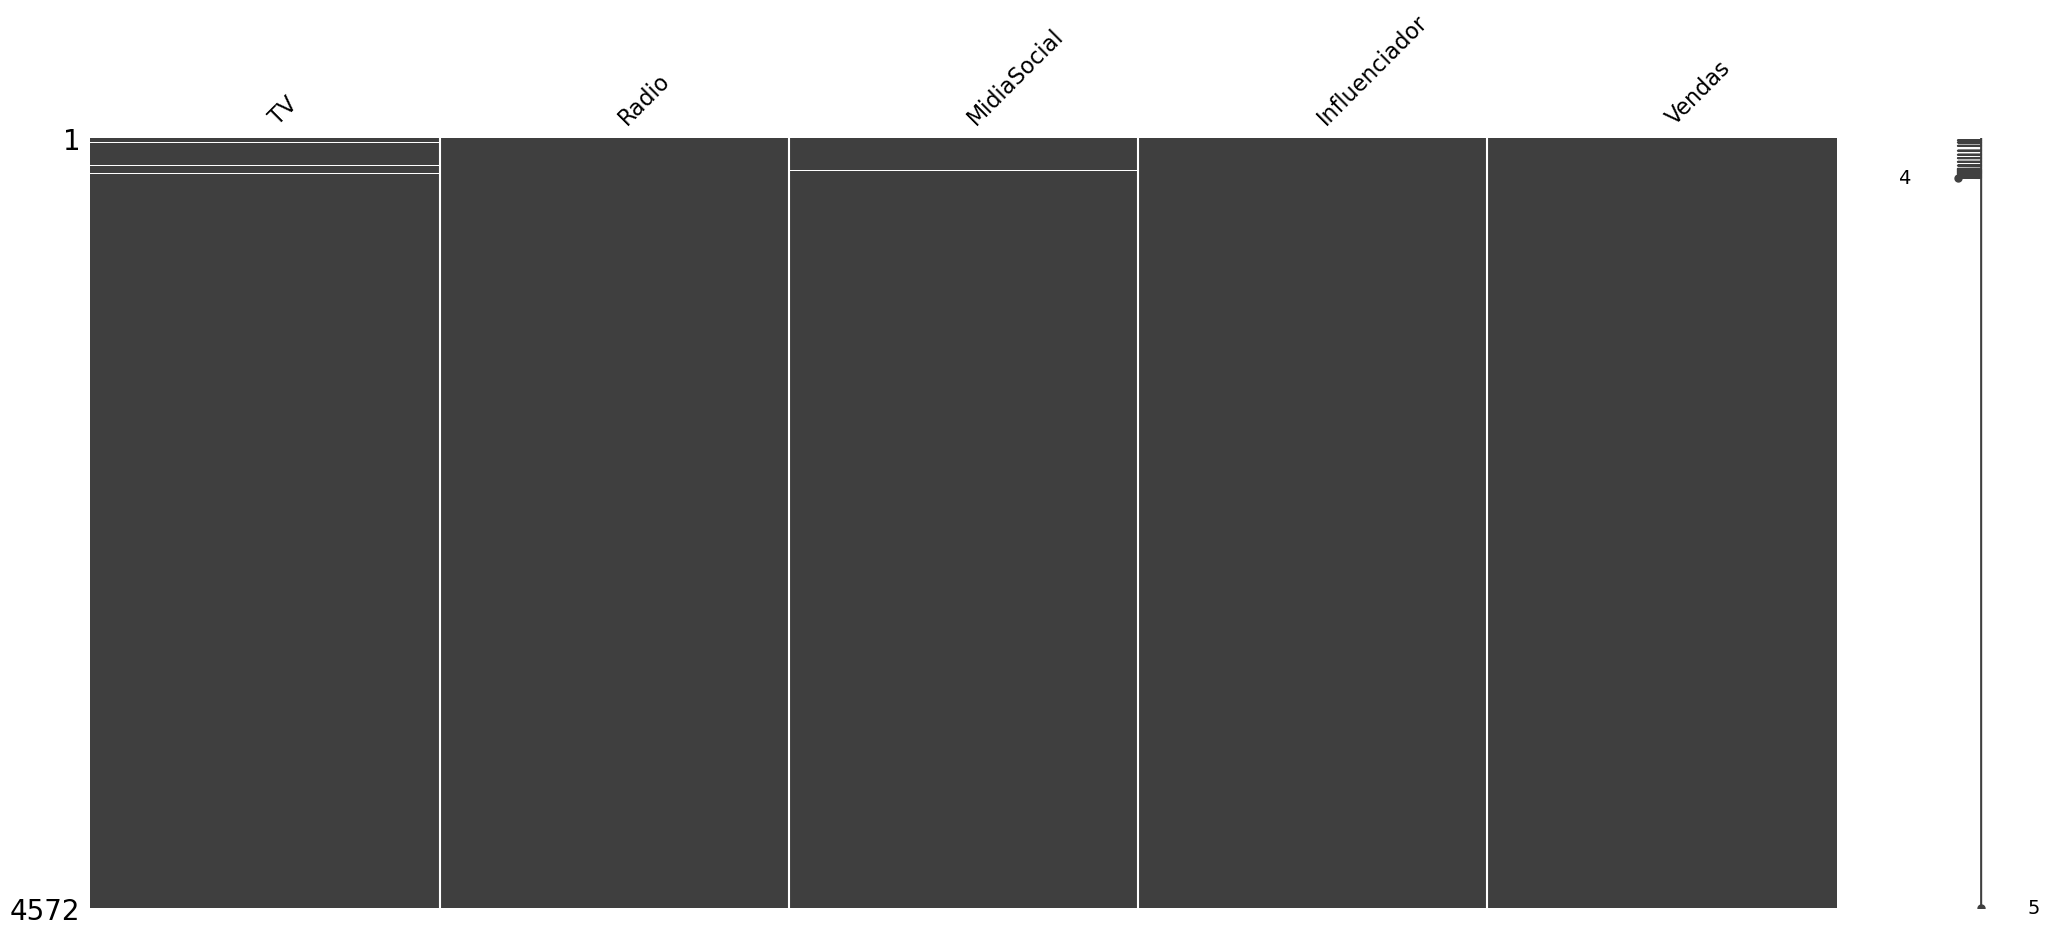

In [17]:
msno.matrix(dados) 

#### Separando os dados em numéricos e categóricos

In [18]:
var_numericos = ['TV','Radio','MidiaSocial','Vendas']
var_categorica = ['Infuenciador']
titulos = ['TV', 'Rádio','Mídia Social','Vendas']

In [19]:
dados['TV'] = dados['TV'].fillna(round(dados['TV'].median(),2))

In [20]:
dados['Radio'] = dados['Radio'].fillna(round(dados['Radio'].median(),2))

In [21]:
dados['MidiaSocial'] = dados['MidiaSocial'].fillna(round(dados['MidiaSocial'].median(),2))

In [22]:
dados['Vendas'] = dados['Vendas'].fillna(round(dados['Vendas'].median(),2))

<Axes: >

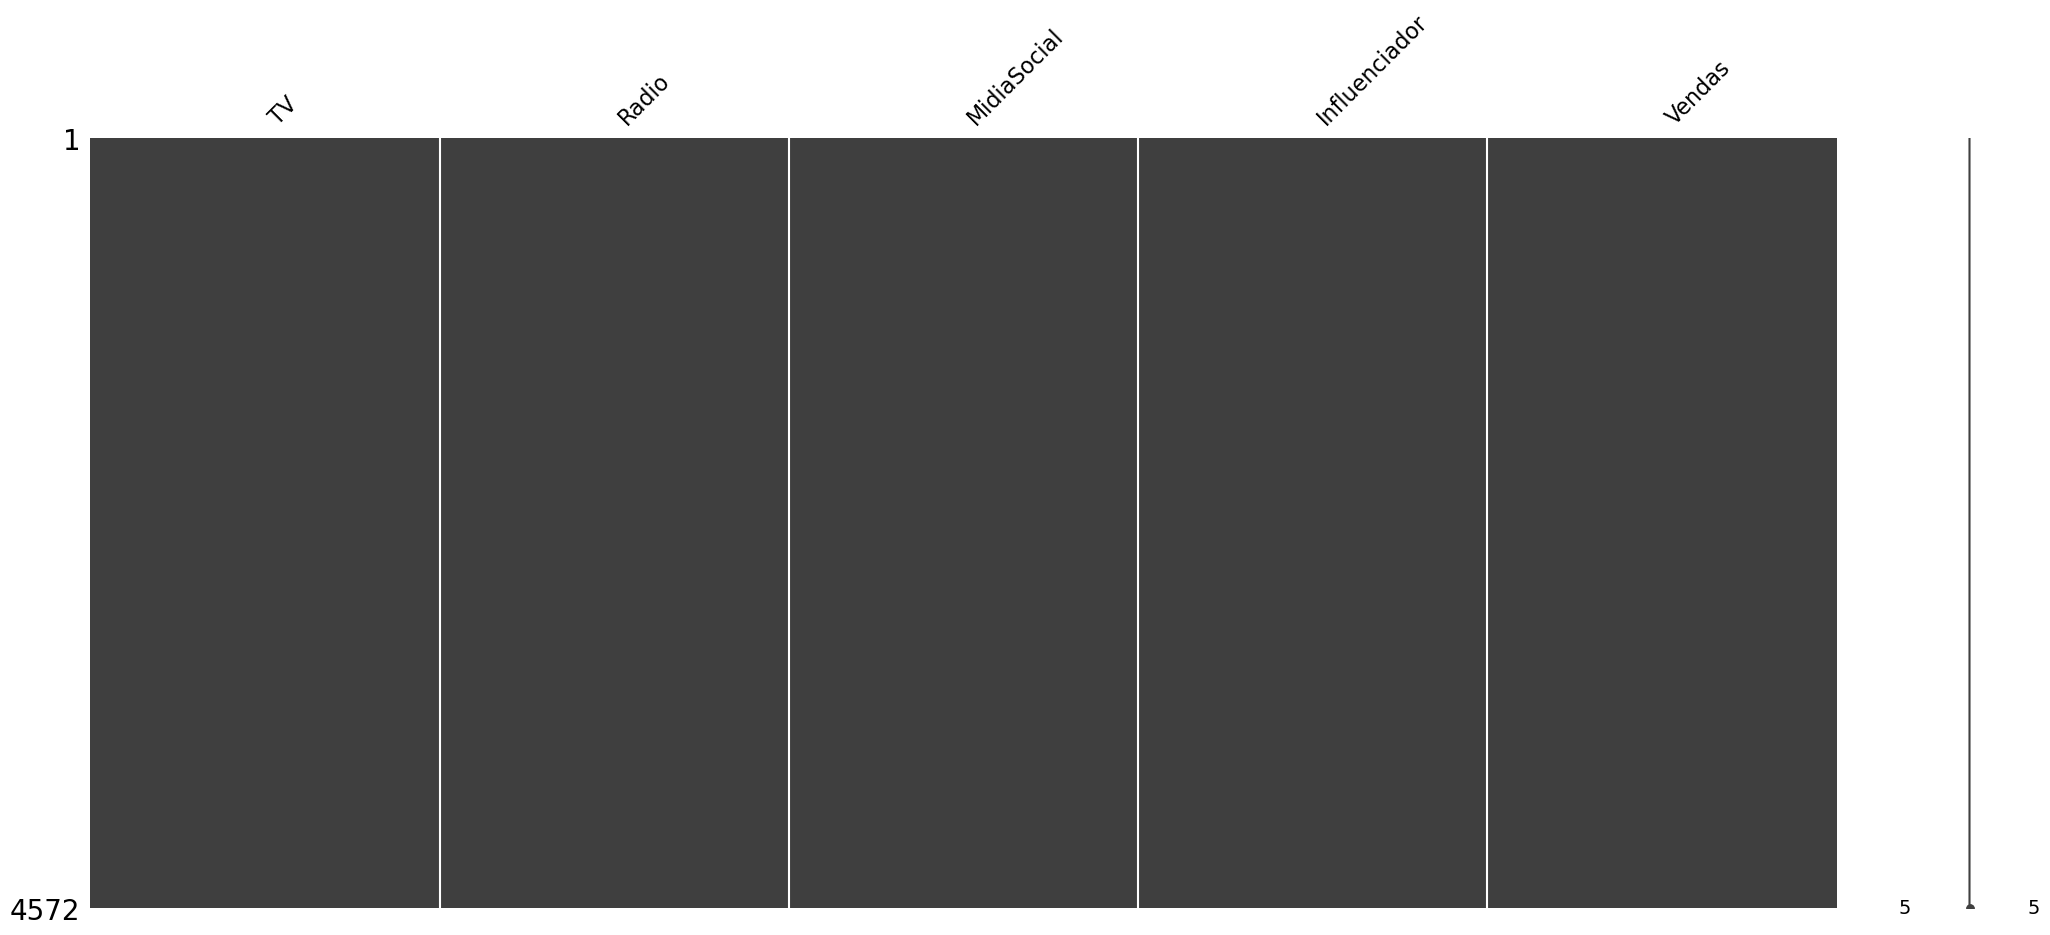

In [23]:
msno.matrix(dados) 

In [24]:
nulos = dados.isnull().sum()
nulos

TV               0
Radio            0
MidiaSocial      0
Influenciador    0
Vendas           0
dtype: int64

## Explorando a variável categórica

In [25]:
cat_counts = dados[cat_var].value_counts()
cat_counts.rename_axis=['Influenciador']
influenciador_dados = cat_counts.reset_index(name = "Frequência")
influenciador_dados.style.highlight_max('Frequência', color = 'lightblue')

,Influenciador,Frequência
0,Mega,1158
1,Micro,1153
2,Nano,1139
3,Macro,1122


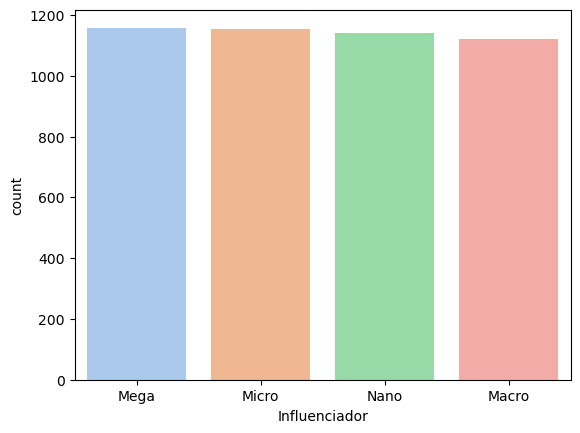

In [26]:
sns.countplot(data = dados, x = dados['Influenciador'])
plt.show()

## Explorando as variáveis numéricas

In [27]:
describe = dados.describe().T.iloc[:,1:]
describe.rename(columns = {'mean': 'Média', 'std': 'Desvio Padrão', 'min':'Mínimo','max': 'Máximo'}, inplace = True)
describe.rename(index = {'Radio': 'Rádio','MidiaSocial': 'Mídia Social'}, inplace = True)
describe['Média'] = describe['Média'].round(2)
describe['Desvio Padrão'] = describe['Desvio Padrão'].round(2)
describe['Mínimo'] = describe['Mínimo'].round(2)
describe['Máximo'] = describe['Máximo'].round(2)
describe['50%'] = describe['50%'].round(2)
describe

,Média,Desvio Padrão,Mínimo,25%,50%,75%,Máximo
TV,54.06,26.10,10.0,32.000000,53.00,77.000000,100.00
Rádio,18.16,9.67,0.0,10.546519,17.86,25.647476,48.87
Mídia Social,3.32,2.21,0.0,1.529879,3.06,4.805832,13.98
Vendas,192.46,93.07,31.2,112.397660,189.23,272.414914,364.08


In [28]:
?plt.savefig

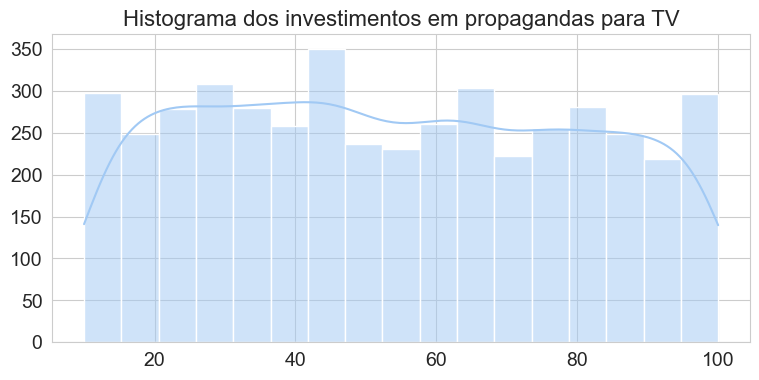

In [29]:
plt.figure(figsize = (9,4))
sns.set_style("whitegrid")
histogram = sns.histplot(data = dados, x = dados['TV'], bins = 'auto', kde = True)
histogram.set_title("Histograma dos investimentos em propagandas para TV", fontsize = 16)
histogram.set_ylabel("")
histogram.set_xlabel("")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig(fname = "imagens/HistogramaTV")

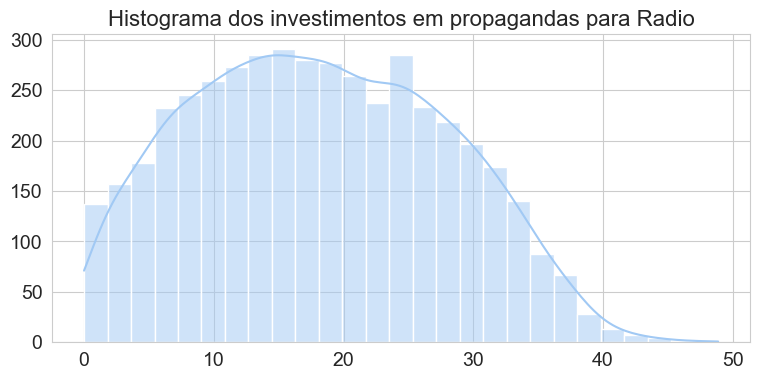

In [30]:
plt.figure(figsize = (9,4))
sns.set_style("whitegrid")
histogram = sns.histplot(data = dados, x = dados['Radio'], bins = 'auto', kde = True)
histogram.set_title("Histograma dos investimentos em propagandas para Radio", fontsize = 16)
histogram.set_ylabel("")
histogram.set_xlabel("")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig(fname = "imagens/HistogramaRadio")

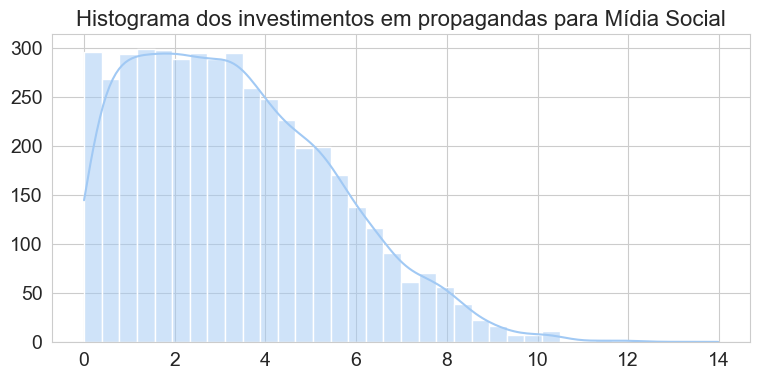

In [31]:
plt.figure(figsize = (9,4))
sns.set_style("whitegrid")
histogram = sns.histplot(data = dados, x = dados['MidiaSocial'], bins = 'auto', kde = True)
histogram.set_title("Histograma dos investimentos em propagandas para Mídia Social", fontsize = 16)
histogram.set_ylabel("")
histogram.set_xlabel("")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig(fname = "imagens/HistogramaMidiaSocial")

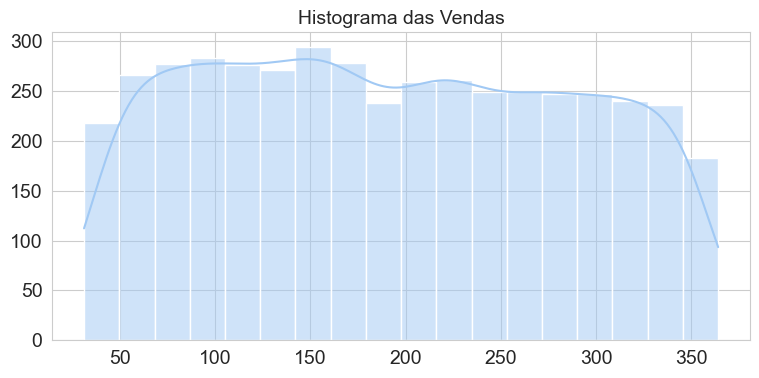

In [32]:
plt.figure(figsize = (9,4))
sns.set_style("whitegrid")
histogram = sns.histplot(data = dados, x = dados['Vendas'], bins = 'auto', kde = True)
histogram.set_title("Histograma das Vendas", fontsize = 14)
histogram.set_ylabel("")
histogram.set_xlabel("")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#plt.show()
plt.savefig(fname = "imagens/histogramaVendas.png")

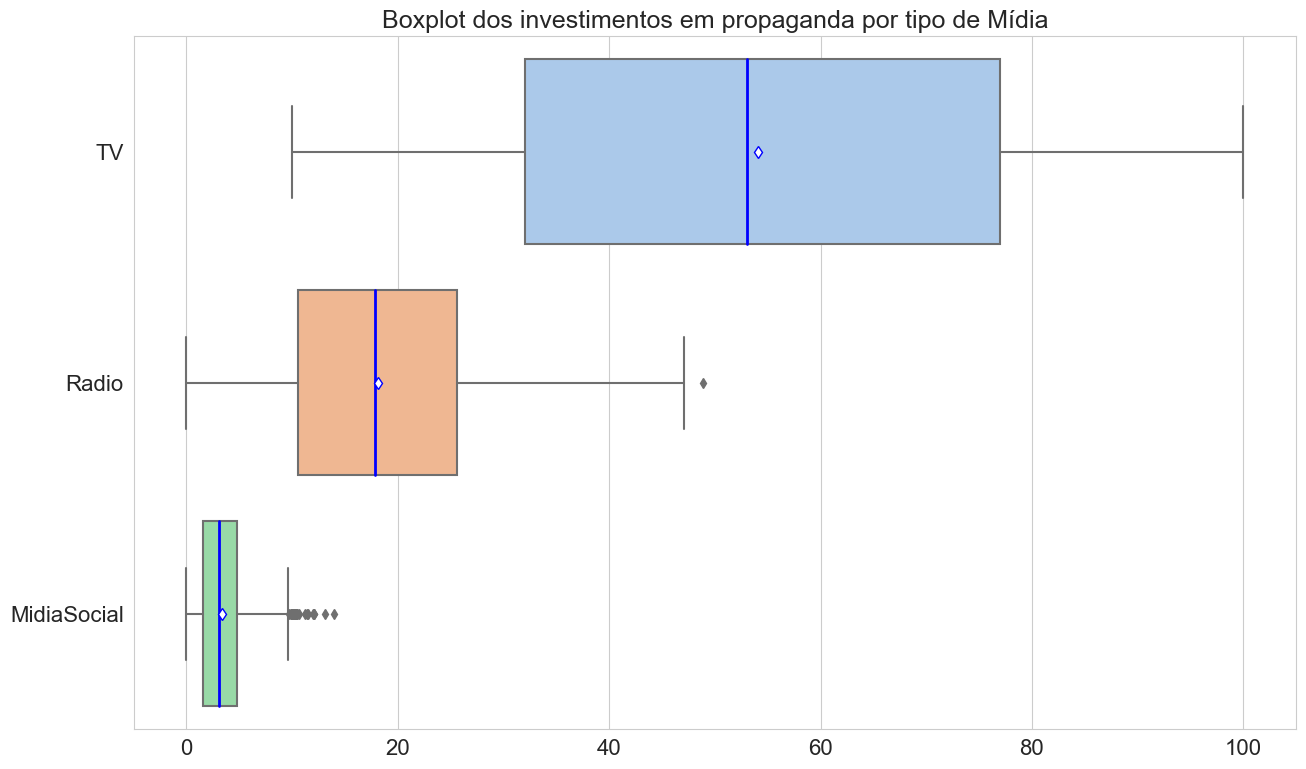

In [33]:
plt.figure(figsize = (15,9)) 
sns.boxplot(dados.iloc[:,0:3], orient = "h",showmeans = True,  meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"blue"},
            medianprops={"color": "blue", "linewidth": 2})
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title("Boxplot dos investimentos em propaganda por tipo de Mídia", fontsize = 18)
#plt.show()
plt.savefig(fname = "imagens/OrcamentoTipoMidiaBoxplot.png")

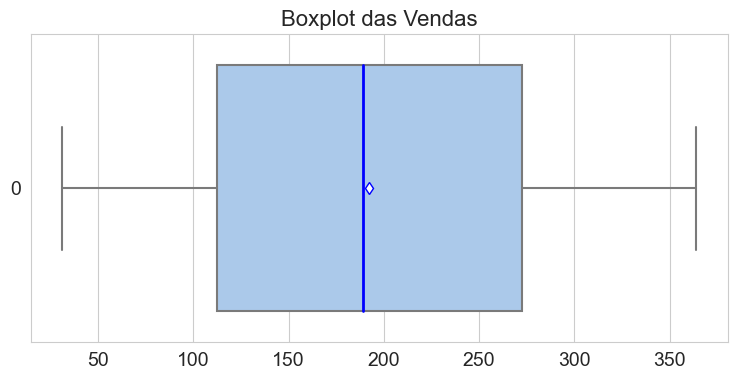

In [34]:
plt.figure(figsize = (9,4)) 
sns.boxplot(dados['Vendas'], orient = "h",showmeans = True,  meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"blue"},
            medianprops={"color": "blue", "linewidth": 2})
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title("Boxplot das Vendas", fontsize = 16)
#plt.show()
plt.savefig(fname = "imagens/boxplotVendas.png")

In [35]:
dados[num_var].skew().round(2)

TV             0.07
Radio          0.14
MidiaSocial    0.65
Vendas         0.07
dtype: float64

In [36]:
dados[num_var].kurt().round(2)

TV            -1.18
Radio         -0.82
MidiaSocial    0.05
Vendas        -1.19
dtype: float64

## Correlação 

In [37]:
correlacao = dados.corr()
correlacao

,TV,Radio,MidiaSocial,Vendas
TV,1.000000,0.866864,0.526967,0.996636
Radio,0.866864,1.000000,0.606781,0.867371
MidiaSocial,0.526967,0.606781,1.000000,0.528117
Vendas,0.996636,0.867371,0.528117,1.000000


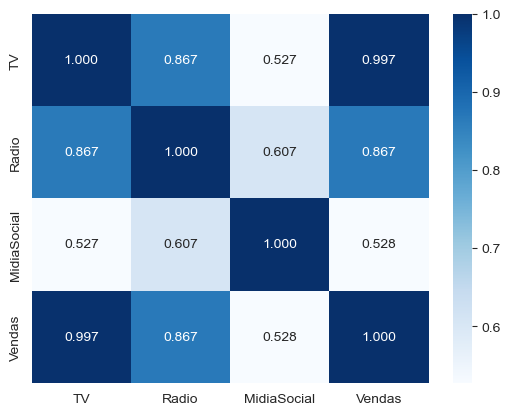

In [38]:
sns.heatmap(data = correlacao, annot = True, fmt = '.3f', cmap="Blues")
plt.savefig(fname = "imagens/Correlacaoheatmap.png")

C:\Users\t-gui\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x400 with 0 Axes>

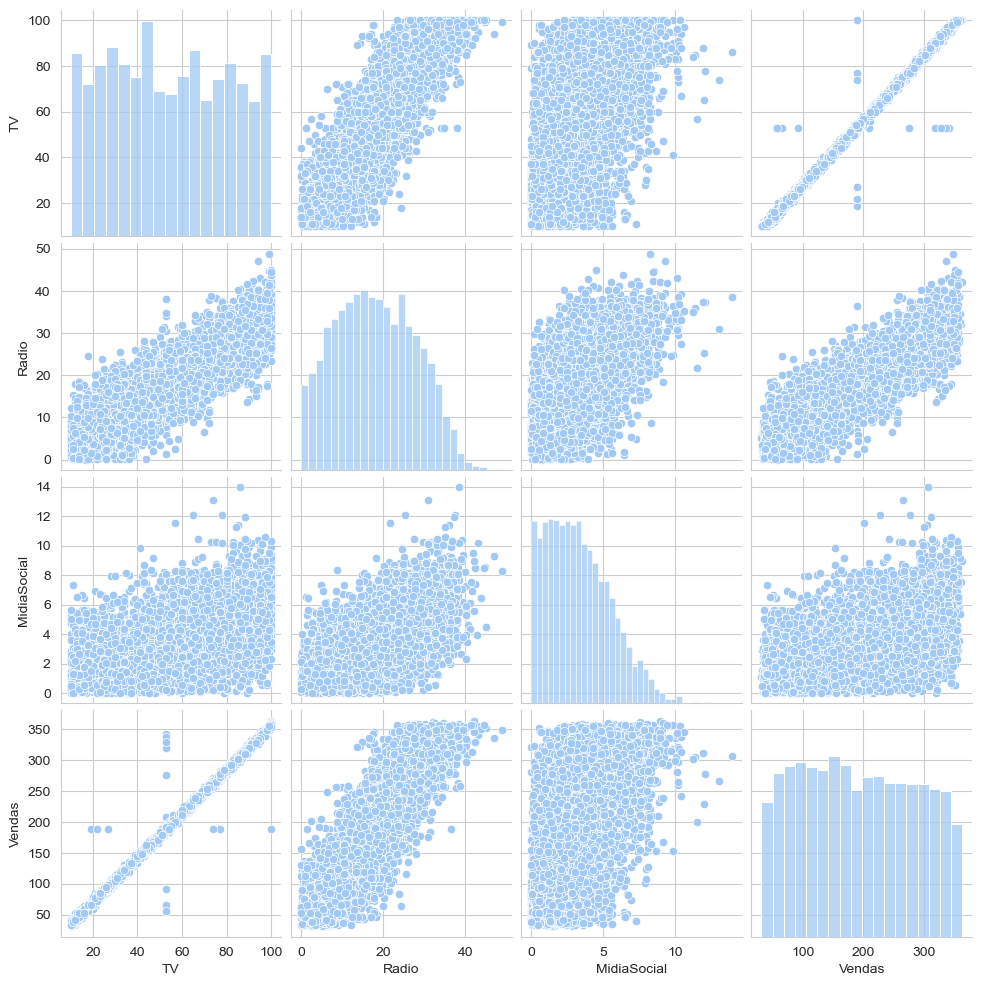

In [39]:
plt.figure(figsize = (20,4)) 
sns.pairplot(dados)
sns.set_style("whitegrid")
sns.despine(top = True)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig(fname = "imagens/Pairplot.png")

## Vendas x Categórica

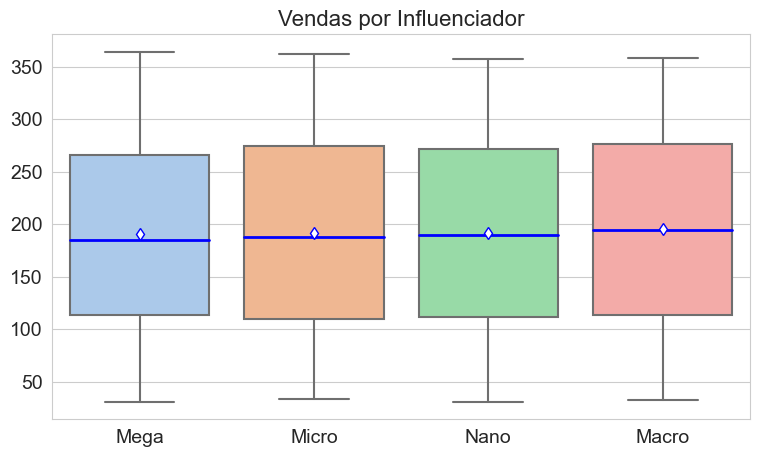

In [40]:
plt.figure(figsize = (9,5)) 
sns.boxplot(x = dados['Influenciador'], y = dados['Vendas'],showmeans = True,  meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"blue"},
            medianprops={"color": "blue", "linewidth": 2})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Vendas por Influenciador", fontsize = 16)
plt.xlabel("")
plt.ylabel("")
#plt.show()
plt.savefig(fname = "imagens/VendasporInfluenciador.png")

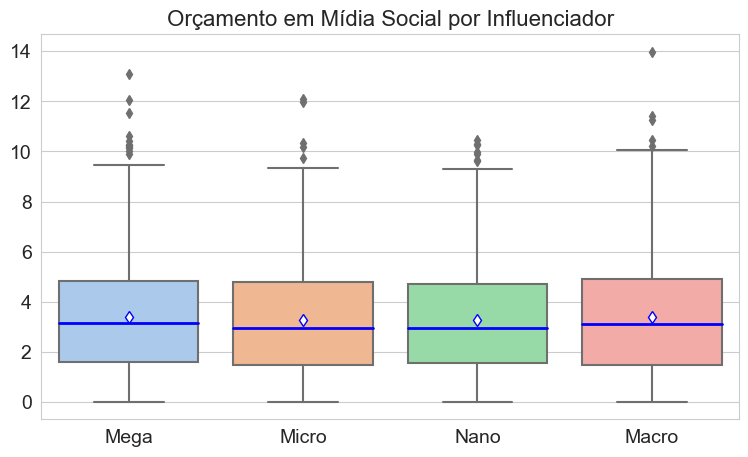

In [41]:
plt.figure(figsize = (9,5)) 
sns.boxplot(x = dados['Influenciador'], y = dados['MidiaSocial'],showmeans = True,  meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"blue"},
            medianprops={"color": "blue", "linewidth": 2})
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title("Orçamento em Mídia Social por Influenciador", fontsize = 16)
plt.xlabel("")
plt.ylabel("")
#plt.show()
plt.savefig(fname = "imagens/OrcamentoMidiaSocialInfluenciador.png")

In [42]:
dados_agrupados = dados.groupby(['Influenciador']).agg({'Influenciador': 'count','MidiaSocial': sum, 'Vendas': sum})
dados_agrupados.rename(columns = {'Influenciador': "Total de Campanhas"}, inplace = True)
dados_agrupados.reset_index(inplace = True)
dados_agrupados.sort_values('Vendas',  ascending = False)

,Influenciador,Total de Campanhas,MidiaSocial,Vendas
2,Micro,1153,3774.083487,221153.307708
1,Mega,1158,3906.081651,220704.737951
0,Macro,1122,3779.283797,219472.076469
3,Nano,1139,3736.094898,218607.763090


In [43]:
dados_agrupados['MidiaSocial'] = dados_agrupados['MidiaSocial'].round(2)
dados_agrupados['Vendas'] = dados_agrupados['Vendas'].round(2)

In [44]:
dados_agrupados.sort_values('Vendas',  ascending = False)

,Influenciador,Total de Campanhas,MidiaSocial,Vendas
2,Micro,1153,3774.08,221153.31
1,Mega,1158,3906.08,220704.74
0,Macro,1122,3779.28,219472.08
3,Nano,1139,3736.09,218607.76
